# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Algoritmo genetico</span>


### The Traveling Salesman Problem

The traveling salesman problem (TSP) consists of a salesman and a set of $N$ cities with positions $\vec{c}_i$. The salesman **has to visit each one of the cities starting from a certain one (e.g. the hometown) and returning to the same city**. The challenge of the problem is that the traveling salesman wants to **minimize the total length of the trip**.

Consider now the ordered sequence of cities, $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, which goes from city 1 to the n$^{th}$ city. The path that minimizes the following loss/cost function:

$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$

or 
$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$


(with $\vec{x}_{N+1}=\vec{x}_1$) is one particular permutation, P, of the ordered sequence of cities $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, i.e. 

$$
\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N = \vec{c}_{P1}, \vec{c}_{P2}, \dots, \vec{c}_{PN}
$$

Note also that any particular permutation of the ordered sequence of cities can be obtained from the combination of many simple permutations among pairs of cities.

We can express a possible path via a 1D vector whose elements, from the first to the last, are integers that represents the cities in the order in which the salesman would visit them; for example for $N=5$ cities one possible path is represented by the vector:

$$
\left[ 1, 3, 5, 4, 2 \right]
$$

In [110]:
import subprocess
from ipywidgets import interact
import ipywidgets as widgets



seme = widgets.IntSlider(value=23, min=11, max=99, step=1,description="seme casuale", style={'description_width': '100px'})
seme

IntSlider(value=23, description='seme casuale', max=99, min=11, style=SliderStyle(description_width='100px'))

In [ ]:
# compile the c++ code:

In [111]:
%%script bash
make

g++ -c commesso.cpp -o main.o -Wall -O3 --std=c++11
g++ random.o main.o -o main.exe


In [112]:
result = subprocess.run(['./main.exe'], input=str(seme.value), text=True, capture_output=True)
print(result.stdout)

seme: 23
evolvo 300 cammini  di lunghezza 34
evolvo 300 cammini  di lunghezza 34



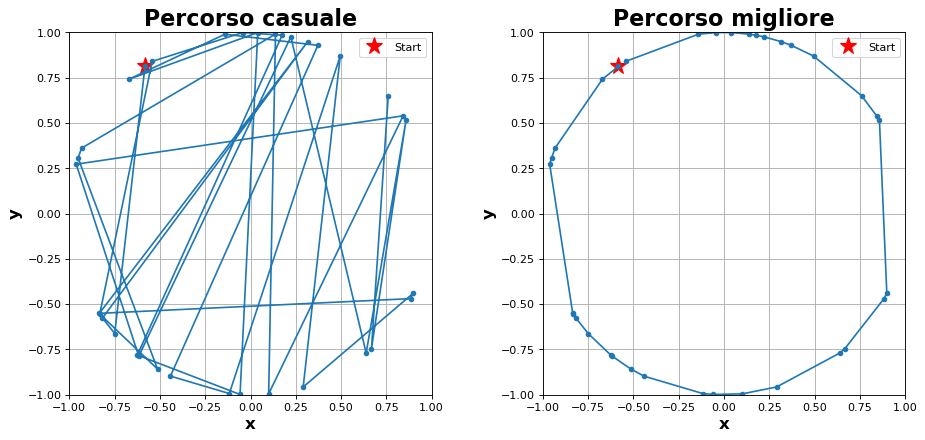

In [113]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure


figure(figsize=(14, 6), dpi=80)
gen = ["0","1"]
tipo = ["casuale","migliore"]


for i in range (2):
    plt.subplot(1,2,i+1)
    x,y = np.loadtxt("risultati/cerchio"+gen[i]+".txt", usecols=(0,1), unpack='true')
    plt.plot(x[0],y[0], marker ="*", color = "r", markersize = 16, label = "Start", linestyle = "")
    plt.plot(x, y, marker = "o", markersize = 4, linestyle = "-")
    plt.ylabel('y', fontsize = 15, fontweight = "bold")
    plt.xlabel('x', fontsize = 15, fontweight = "bold")
    plt.grid(True)
    plt.title('Percorso '+tipo[i], fontsize = 20, fontweight = "bold")
    plt.legend()

   # rectangle = plt.Rectangle((0,0), 1, 1, fc='r', alpha = 0.15)
    #plt.gca().add_patch(rectangle)

    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.gca().set_aspect('equal', adjustable='box')

plt.show()

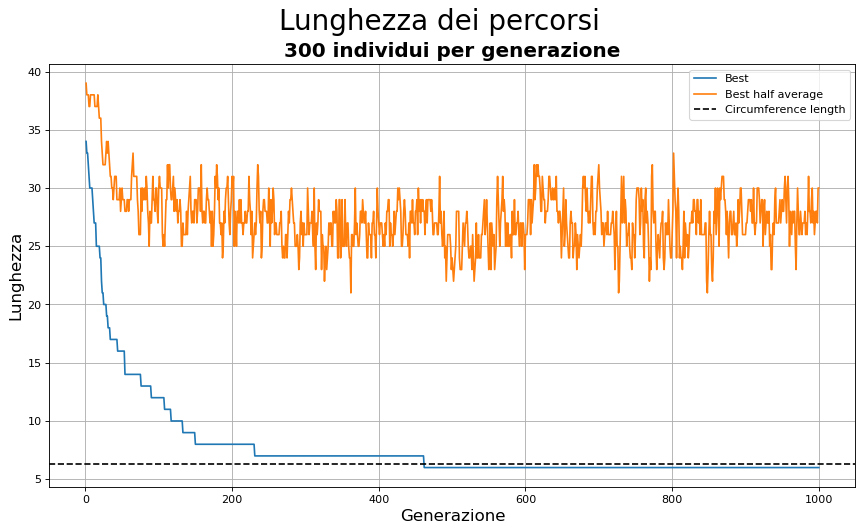

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

figure(figsize=(13, 7), dpi=80)
plt.suptitle("Lunghezza dei percorsi\n", fontsize = 25)

indivs =["300", "1000"]

for i in range(0,1):
    #plt.subplot(2,1,i+1)
    best = np.loadtxt("risultati/miglioriCerchio.txt", usecols=(0), unpack='true')
    gen= np.linspace(1,len(best),len(best))
    plt.plot(gen, best, marker = "", label = "Best") 
    bestave = np.loadtxt("risultati/migliori_semimediaCerchio.txt", usecols=(0), unpack='true')
    plt.plot(gen, bestave, marker = "", label = "Best half average") 
    plt.ylabel('Lunghezza', fontsize =15)
    plt.xlabel('Generazione', fontsize =15)
    plt.grid(True)
    plt.axhline(y=2*np.pi, color = 'k', linestyle = '--', label = "Circumference length")
    plt.title(indivs[i]+' individui per generazione', fontsize = 18, fontweight = "bold")
    plt.legend()

plt.subplots_adjust(hspace=0.4)
plt.show()



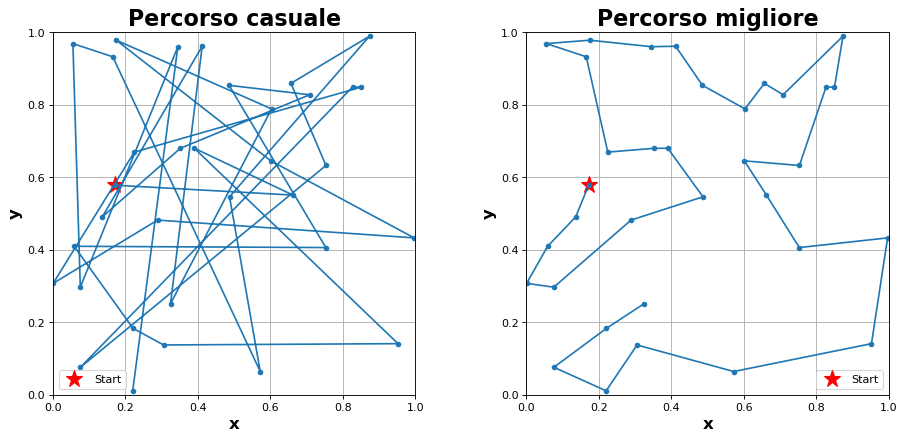

In [114]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure


figure(figsize=(14, 6), dpi=80)
gen = ["0","1"]
tipo = ["casuale","migliore"]

for i in range (2):
    plt.subplot(1,2,i+1)
    x,y = np.loadtxt("risultati/quadrato"+gen[i]+".txt", usecols=(0,1), unpack='true')
    plt.plot(x[0],y[0], marker ="*", color = "r", markersize = 16, label = "Start", linestyle = "")
    plt.plot(x, y, marker = "o", markersize = 4, linestyle = "-")
    plt.ylabel('y', fontsize = 15, fontweight = "bold")
    plt.xlabel('x', fontsize = 15, fontweight = "bold")
    plt.grid(True)
    plt.title('Percorso '+tipo[i], fontsize = 20, fontweight = "bold")
    plt.legend()

   # rectangle = plt.Rectangle((0,0), 1, 1, fc='r', alpha = 0.15)
    #plt.gca().add_patch(rectangle)

    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.gca().set_aspect('equal', adjustable='box')

plt.show()

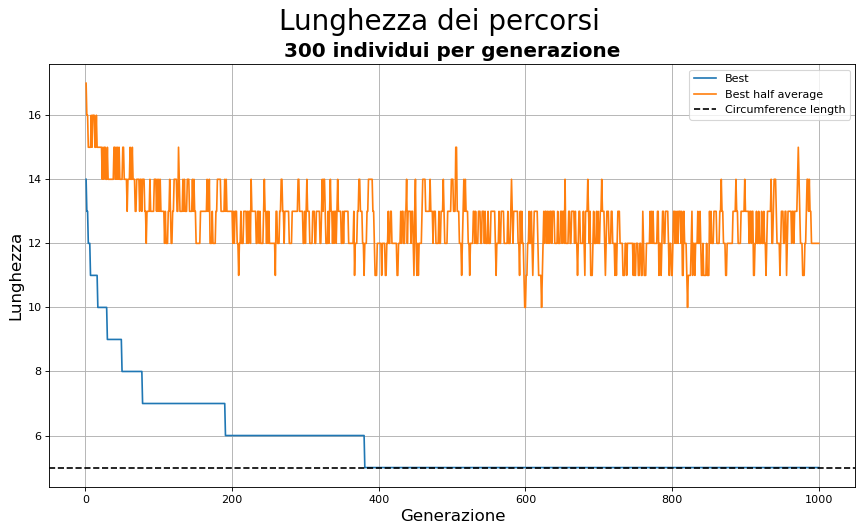

In [82]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

figure(figsize=(13, 7), dpi=80)
plt.suptitle("Lunghezza dei percorsi\n", fontsize = 25)

indivs =["300", "1000"]

for i in range(0,1):
    #plt.subplot(2,1,i+1)
    best = np.loadtxt("risultati/miglioriQuadrato.txt", usecols=(0), unpack='true')
    gen= np.linspace(1,len(best),len(best))
    plt.plot(gen, best, marker = "", label = "Best") 
    bestave = np.loadtxt("risultati/migliori_semimediaQuadrato.txt", usecols=(0), unpack='true')
    plt.plot(gen, bestave, marker = "", label = "Best half average") 
    plt.ylabel('Lunghezza', fontsize =15)
    plt.xlabel('Generazione', fontsize =15)
    plt.grid(True)
    plt.axhline(y=5, color = 'k', linestyle = '--', label = "Circumference length")
    plt.title(indivs[i]+' individui per generazione', fontsize = 18, fontweight = "bold")
    plt.legend()

plt.subplots_adjust(hspace=0.4)
plt.show()

